In [55]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier      # 분류
# from sklearn.neighbors import KNeighborsRegressor       # 회귀 예측
from sklearn.linear_model import LinearRegression       # 선형 회귀
from sklearn.preprocessing import PolynomialFeatures    # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import requests
import random
import glob,os.path,re
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False

In [56]:
df = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hongong-ml/master/perch_full.csv')
perch = df.to_numpy()
perch

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [57]:
df.describe()

,length,height,width
count,56.000000,56.000000,56.000000
mean,27.892857,7.862143,4.745536
std,9.021668,2.878343,1.775006
min,8.400000,2.110000,1.410000
25%,21.825000,5.690000,3.520000
50%,25.300000,6.920000,4.155000
75%,36.625000,10.850000,6.450000
max,44.000000,12.800000,8.140000


In [70]:
# 타겟
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [71]:
train_input, test_input, train_target, test_target = train_test_split(perch,perch_weight,random_state=1)
train_input

array([[21.  ,  5.69,  3.56],
       [16.2 ,  4.59,  2.63],
       [24.  ,  7.29,  3.72],
       [43.  , 11.93,  7.28],
       [28.7 ,  7.59,  4.64],
       [24.6 ,  6.73,  4.17],
       [39.  , 11.14,  6.  ],
       [43.5 , 12.6 ,  8.14],
       [25.  ,  6.44,  3.68],
       [28.  ,  7.82,  4.2 ],
       [21.3 ,  6.38,  3.53],
       [23.  ,  5.22,  3.63],
       [40.  , 11.93,  7.11],
       [27.3 ,  8.32,  5.14],
       [22.  ,  5.88,  3.52],
       [42.  , 12.8 ,  6.87],
       [27.5 ,  7.17,  4.34],
       [23.5 ,  6.28,  3.72],
       [17.4 ,  4.59,  2.94],
       [22.  ,  6.11,  3.41],
       [26.5 ,  7.17,  4.14],
       [25.6 ,  6.56,  4.24],
       [40.  , 11.14,  6.63],
       [36.5 , 10.88,  6.86],
       [22.  ,  5.52,  4.  ],
       [44.  , 12.49,  7.6 ],
       [22.5 ,  6.79,  3.62],
       [24.  ,  6.38,  3.82],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [43.  , 12.51,  7.42],
       [13.7 ,  3.53,  2.  ],
       [22.  ,  6.11,  3.52],
       [ 8

In [72]:
lr = LinearRegression()
lr.fit(train_input,train_target)
lr.predict(test_input)
lr.score(train_input,train_target)
lr.score(test_input,test_target)

0.9520231504649028

In [100]:
# 특성 추가(제곱)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
df = pd.DataFrame(train_poly)
df
# train_poly

,0,1,2,3,4,5,6,7,8
0,21.0,5.69,3.56,441.00,119.490,74.760,32.3761,20.2564,12.6736
1,16.2,4.59,2.63,262.44,74.358,42.606,21.0681,12.0717,6.9169
2,24.0,7.29,3.72,576.00,174.960,89.280,53.1441,27.1188,13.8384
3,43.0,11.93,7.28,1849.00,512.990,313.040,142.3249,86.8504,52.9984
4,28.7,7.59,4.64,823.69,217.833,133.168,57.6081,35.2176,21.5296
5,24.6,6.73,4.17,605.16,165.558,102.582,45.2929,28.0641,17.3889
6,39.0,11.14,6.00,1521.00,434.460,234.000,124.0996,66.8400,36.0000
7,43.5,12.60,8.14,1892.25,548.100,354.090,158.7600,102.5640,66.2596
8,25.0,6.44,3.68,625.00,161.000,92.000,41.4736,23.6992,13.5424
9,28.0,7.82,4.20,784.00,218.960,117.600,61.1524,32.8440,17.6400


In [101]:
lr.fit(train_poly,train_target)
lr.predict(test_poly)
lr.score(train_poly,train_target)
# lr.score(test_poly,test_target)

0.9946542393134594

In [102]:
# 특성 추가(제곱)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4,include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
# train_poly

In [103]:
lr.fit(train_poly,train_target)
lr.predict(test_poly)
lr.score(train_poly,train_target)
# lr.score(test_poly,test_target)

0.9997703490139368

### 규제 - 릿지규제(회귀), 라쏘규제(회귀)
선형회귀에서 특성의 값이 많이 늘어났을 때, 특성의 값을 규제, test세트에서도 제대로 예측할 수 있도록 함.

In [106]:
# 릿지회귀, 라쏘회귀 적용.
# 규제를 적용하려면 꼭 표준화 작업을 해줘야 함. >>  (데이터 - 평균) / 표준편차

from sklearn.preprocessing import StandardScaler    # 표준화 작업 자동
ss = StandardScaler()
ss.fit(train_poly) # 표준화 작업 완료

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)



In [107]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled,train_target)
ridge.score(train_scaled,train_target)

0.9924092399174392

In [108]:
ridge.score(test_scaled,test_target)

0.9525128919113178

In [120]:
# 선형회귀
# 특성값 추가
# 규제
# 과대 적합을 해소
# 릿지 회귀에서도 강도를 어느정도로 할 지에 따라 예측률이 높아지는 형태가 나옴.
# Ridge(alpha=1) -> for문을 사용해서 alpha 늘림

train_score = []    # 그래프 적용을 위한 배열
test_score = []     # ''

alpha_list = [0.001,0.01,0.1,1,10,100] # 0.001~100 예측률

for alpha in alpha_list:
    # 규제를 적용한 훈련
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled,train_target)
    train1 = ridge.score(train_scaled,train_target)
    test1 = ridge.score(test_scaled,test_target)
    train_score.append(train1)
    test_score.append(test1)
    print(train1)
    print(test1)
    print('------------------')

0.9959305840218848
0.8321939692902471
------------------
0.994660718818256
0.9133250346522749
------------------
0.9934418213117088
0.9443551845630942
------------------
0.9924092399174392
0.9525128919113178
------------------
0.9896597739077723
0.9719782619992624
------------------
0.981333355630015
0.9705185558841537
------------------


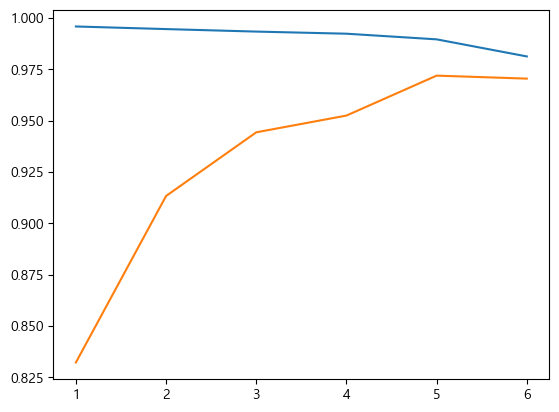

In [133]:
# x축 눈금적용
g1 = [1,2,3,4,5,6]
# g1 = np.log10(alpha_list)
plt.plot(g1,train_score)
plt.plot(g1,test_score)

In [128]:
ridge = Ridge(alpha=100)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.981333355630015
0.9705185558841537
